#1차원데이터
 - 평균값(기댓값), 표본분산, 불편분산(ddof=1).표준편차
 - 표본분산은 표본이 평균을 사용해서 분산을 계산한 값으로 분산을
 과소추정하는 경향이 있으며, 그 경향을 없애기 위한 것이 불편분산
  표본분산보다 조금 큰 값이 된다.
 - 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 스케일이 다르면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수 
- 표본분산과 비편향 분산
- 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
- 표본분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
- 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
- 통계학에서는 이 비편향 분산을 사용하는 경우가 많다.
- 불편분산은 n대신 n-1로 나누어 구할 수 있다.

[표본분산이 분산을 과소 평가하는 이유]
- 

In [134]:
import numpy as np
import pandas as pd

df=pd.read_csv('./data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [135]:
scores = np.array(df.english)
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [95]:
scores_df = pd.DataFrame({'scores':scores},
                         index=pd.Index(['A','B','C','D',
                                'E','F','G','H','I','J'],
                         name='student'))
                        
scores_df

,scores
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [138]:
#평균값
print(sum(scores)/len(scores))
print(np.mean(scores))
scores_df.mean()

58.38
58.38


scores             55.0
deviation value    50.0
dtype: float64

In [31]:
scores_df.median()

scores    56.5
dtype: float64

In [36]:
sorted_scores=np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [139]:
n=len(sorted_scores)
if n %2 ==0:
    m0=sorted_scores[n//2-1]
    m1=sorted_scores[n//2]
    median=(m0+m1)/2
else:
    median=sorted_median[(n+1)//2-1]
median

56.5

In [42]:
print(np.median(scores))
scores_df.median()

56.5


scores    56.5
dtype: float64

In [140]:
#최빈값
pd.Series([1,1,1,2,2,3]).mode()


0    1
dtype: int64

In [76]:
#분산과 표준편차
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [141]:
#편차 
mean = np.mean(scores)
print(mean)
deviation=scores-mean
deviation

58.38


array([-16.38,  10.62,  -2.38, -17.38,  -1.38, -10.38,   6.62,  -9.38,
         6.62,  -0.38,  11.62, -11.38,  -7.38,   5.62,   3.62,  11.62,
        12.62,   9.62,  14.62, -21.38,   6.62,   6.62,   2.62,  -6.38,
        -1.38,  -1.38,  16.62,   2.62, -11.38,  -4.38,   7.62,  -4.38,
        -4.38, -16.38, -21.38,  20.62,  -2.38,   3.62,   3.62,  -3.38,
         4.62,  -1.38,  -1.38,   8.62,  -3.38, -13.38,   7.62,  -3.38,
         5.62,   7.62])

In [142]:
np.mean(deviation)

-2.5579538487363606e-15

In [143]:
#Q.20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 
#편차의 합을 구하세요.
np.random.seed(0)
a = np.arange(20)
mean = np.mean(a)
print(mean)
dev=a-mean
display(dev)
display(dev.sum())


9.5


array([-9.5, -8.5, -7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,
        1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

0.0

#분산
#편차로만하면 얼마나 멀리 떨어져있는지 모르잖아
#얼마나 벌어져있는지 알 수 있짠항 그게 분산이얌
 나중에 루트씌어서 환원해줌되잖아
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산
* Numpy는 표본분산,Pandas는 불편분산(편향x)
* Pandas에서 표본분산을 계싼하려면 var메소드의 인수를
 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당.
    

In [144]:
np.mean(deviation **2)

94.1156

In [145]:
np.var(scores)

94.1156

In [146]:
scores_df.var(ddof=0)

scores              86.0
deviation value    100.0
dtype: float64

In [147]:
df1=scores_df.copy()
df1['deviation'] =deviation
# df1['square of deviation']=np.square('deviation')
df1

ValueError: Length of values (50) does not match length of index (10)

In [92]:
df1.mean()

scores    55.0
dtype: float64

In [94]:
#표준편차
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [99]:
np.std(scores)

9.273618495495704

In [109]:
df.std(ddof=0)

scores    9.273618
dtype: float64

In [114]:
#범위와 4분위수 범위
#가장 큰 수와 가장 작은 수의 차이 = > 범위
np.max(scores) - np.min(scores)

28

In [117]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [118]:
# 요약통계표
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [120]:
#데이터의 정규화

print(f'평균:{scores.mean()},표준편차: {scores.std().round(4)}')

평균:55.0,표준편차: 9.2736


In [128]:
#데이터 표준화 : 데이터에서 평균을 빼고 표준편차로 나누는 작업을 표준화
#편차를 표준편차(분산의 루트씌운 것)로 나누니깐 
#평균이 0, 표준편차가 1인 분포로 바꿔줌
z = (scores-np.mean(scores))/np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [129]:
z =50+10 * (scores-np.mean(scores))/np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [130]:
scores_df['deviation value']=z
scores_df

,scores,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [148]:
df=pd.read_csv('./data/ch2_scores_em.csv')

eng_scores = np.array(df.english)
pd.Series(eng_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [152]:
#분할 데이터의 개수를 표로 정리한 도수분포표
freq,_=np.histogram(eng_scores,bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [154]:
#점수를 나눈 구간을  class(계급)이라하고, 계급에 속한 학생수를 도수frequnct
#라고 한다. 각 구간의 폭을 계끕폭, 계급의 수를 계급수라고 한다
freq_class=[f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq},
                           index=pd.Index(freq_class,name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [155]:
#계급값 : 각 계끕을 대표하는 값으로 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)] # 나누기 2의 몫
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [157]:
#상대도수-상대적인 비율
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [158]:
#누적상대도수: 해당 계급까지의 상대도수 합 cumulative
cum_rel_freq =np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [165]:
freq_dist_df['class value']=class_value
freq_dist_df['relative frequency']= rel_freq
freq_dist_df['cumulative relative frequency']=cum_rel_freq
freq_dist_df= freq_dist_df[['class value','frequency',
                           'relative frequency','cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [171]:
#최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

65

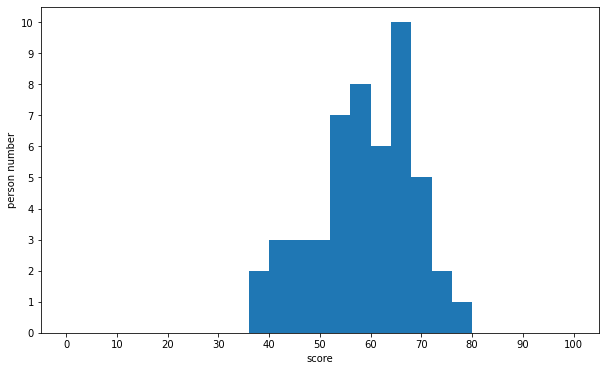

In [188]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax2 = fig.add_subplot(121)

#ax2 = fig.add_subplot(111)
freq,_,_=ax.hist(eng_scores,bins=25,range=(0,100)) 
#freq,_,_=ax2.hist(eng_scores,bins=25,range=(0,100))
# _;ax에서 나온 값을 받는데 별 중요하지 않은 값을 줄 때 
#ax.hist를 실행하면 함수에 의해 3개의 객체가 튜플 형태로 
#나오게 되는데, 제일 앞부분이 저희가 궁금해 하는 부분으로, 그 부분만 
#이름으로 명명하고 나머지는 의미 없는 더미변수 처리 하였습니다.
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()
plt.close()

ValueError: x and y must have same first dimension, but have shapes (25,) and (10,)

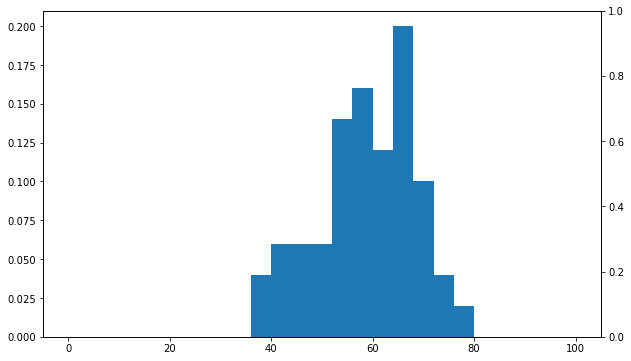

In [202]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121) #여기다 추가하겠다 1행1열 첫번째에다
ax2 = fig.add_subplot(122)

weights=np.ones_like(eng_scores)/len(eng_scores)
# 상대도수으 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌필요있
#y축의 스케일이 다른 그래프를  ax1과 동일한 영역에 생성
freq,_,_=ax1.hist(eng_scores,bins=25,range=(0,100),weights=weights)
cul_rel_freq = np.cumsum(rel_freq)
class_value=[(i+(i+4))//2 for i in range(0,100,4)]
ax2.plot(class_value,cum_rel_freq,Is='--',marker='o',color='gray')
ax2.grid(visible=False)



ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()
plt.close()

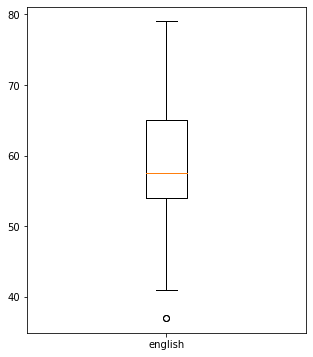

In [206]:
#상자그림
fig=plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(eng_scores,labels=['english'])
plt.show()
plt.close()

In [209]:
# 표본분산
data =np.array([2,3,3,4,4,4,4,5,5,6])
mu= np.sum(data)/len(data) # 평균값
s = np.sum((data-mu)**2)/len(data)  
#편차제곱의합을 길이로 나눔
s

1.2

In [211]:
#불편분산
s1 =  np.sum((data-mu)**2)/(len(data)-1)  
s1

1.3333333333333333

#표본분산보다 불편분산이 n-1로 했기 때문에 커졌죠
 물고기의 몸 길이 배열이라고 볼게요
 평균을 보면 4야 
 표본분산이 1.2
 불편분산이 1.3
- 호수 안에 물고기가 7마리가 있다. 몸길이 모집단{1,2,3,4,5,6,7},모평균이 4, 
샘플링3마리 {1,2,3} 표본평균2, 이 떄 분산을 구하려면 표본평균을
가져와서 하겠지. 모평균으로 하는 거 보다도 
- 이 때 분산은 모평균을 모르기 때문에 표본평균과의 거리를
계산하며 분산을 과소평가 하게 된다.
- 표본 분산보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신
N-1 로 나누어 불편분산을 구할 수 있다.


#분산은 데이터와 평균값 간의 거리죠
 모평균간의 데이터 거리를 계산하면
#데이터에서 평균을 뺴준 것을 제곱한거의 합으로 구할 수 있고
#그것을 개수로 나누면 평균을 구할 수 있죠
#호수안에 물고기가 8마리, 
https://m.blog.naver.com/ao9364/222023124818


In [350]:
#[과제] 1변량(차원) 데이터 data에 대하여 평균,표본분산,
#불편분산,표준 편차,최대,최소, 4분위수, 중앙값을 구하세요
#단 함수사용하는 경우와 사용하지 않는 경우 모두 수행
print(data)
#평균값

mean=np.sum(data)/len(data)
print(mean)
print(data.sum()/len(data),'\n')

# 표본분산
dev=data-np.mean(data)
dev
print(np.mean(dev**2))
#데이터에서 평균의 제곱을 빼준 합을 데이터의개수로 나누어줌
print(np.sum((data-mean**2)/len(data)))
print(np.var(data),'\n')

# 불편분산
print(np.var(data,ddof=1))
print(np.sum((data-np.mean(data))**2)/(len(data)-1),'\n')

#표준편차
print(np.std(data))
print(np.sqrt(np.var(data,ddof=0)),'\n') #분산의 제곱

#최대,최소,4분위수
print(np.max(data))
print(np.min(data))
print(np.max(data)-np.min(data),'\n')


#4분위수
s1 = np.percentile(data,25)
s2 = np.percentile(data,50)
s3 = np.percentile(data,75)
scores_IQR = s3-s1
scores_IQR



[2 3 3 4 4 4 4 5 5 6]
4.0
4.0 

1.2
-11.999999999999998
1.2 

1.3333333333333333
1.3333333333333333 

1.0954451150103321
1.0954451150103321 

6
2
4 



1.5

In [342]:
#중앙값
print(np.median(data))


sorted_data = np.sort(data)
n= len(data)
if n %2==0:
    m0 = sorted_data[n//2-1]
    m1 = sorted_data[n//2]
    median = (m0+m1)/2
else:
    median= sorted_data[(n+1)//2-1]
median


4.0


4.0

In [319]:
#불편분산
print(np.mean(data)**2)
print(np.sum(data-np.mean(data)**2)/len(data)-1)
((data**2)/len(data))-(data.sum()/len(data))**2

16.0
-13.0


array([-15.6, -15.1, -15.1, -14.4, -14.4, -14.4, -14.4, -13.5, -13.5,
       -12.4])

#2차원 데이터

In [285]:
df = pd.read_csv('./data/ch2_scores_em.csv',index_col='student number')
en_scores =np.array(df.english)[:10]
ma_scores = np.array(df.mathematics)[:10]
sdf = pd.DataFrame({'english':en_scores,
                  'mathematics':ma_scores},
                  index=pd.Index(['A','B','C','D',
                                'E','F','G','H','I','J'],
                                name='student'))

df.head()


,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [245]:
#공분산
dfc = sdf.copy()
dfc['eng_deviation']=dfc.english - dfc.english.mean()
dfc['math_deviation']=dfc.mathematics-dfc.mathematics.mean()
dfc['product of deviation']= dfc['eng_deviation']*dfc['math_deviation']
dfc.head()

,english,mathematics,eng_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2


In [247]:
dfc['product of deviation'].mean()

62.8

In [248]:
cov_mat = np.cov(en_scores,ma_scores,ddof=0)
cov_mat
#86 (영어의 분산), 영어와 수학의 분산 62.8
# 62.8은 수하과 영어의 분산, 68.44는 수학의 분산

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [252]:
np.var(en_scores,ddof=0),np.var(ma_scores,ddof=0)

(86.0, 68.44000000000001)

In [257]:
#상관계수
np.cov(en_scores,ma_scores,ddof=0)[0,1]/(np.std(en_scores)*np.std(ma_scores))
#양의 상관관계가 높다 

0.8185692341186713

In [259]:
# 상관 행렬로 계산하기
np.corrcoef(en_scores,ma_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [265]:
# 데이터 프레임의 경우
dfc[['english','mathematics']].corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [352]:
#[과제] 10행 2열 2차원 배열을 생성하고 두열간의 
#공분산 및 상관계수를 구하세요(단,numpy,pandas 두가지
#방식으로 모두 수행)
np.random.seed(0)
arr= np.random.randint(0,21,size=(10,2))
print(arr,arr.ndim,'\n')
cov = np.cov(arr,ddof=0)
print(cov,'\n')
print(np.corrcoef(arr),'\n')
ar_df = pd.DataFrame(arr)
ar_df
print(ar_df.corr(),'\n')
print(np.corrcoef(ar_df))

[[12 15]
 [ 0  3]
 [ 3  7]
 [ 9 19]
 [18  4]
 [ 6 12]
 [ 1  6]
 [ 7 14]
 [17  5]
 [13  8]] 2 

[[  2.25   2.25   3.     7.5  -10.5    4.5    3.75   5.25  -9.    -3.75]
 [  2.25   2.25   3.     7.5  -10.5    4.5    3.75   5.25  -9.    -3.75]
 [  3.     3.     4.    10.   -14.     6.     5.     7.   -12.    -5.  ]
 [  7.5    7.5   10.    25.   -35.    15.    12.5   17.5  -30.   -12.5 ]
 [-10.5  -10.5  -14.   -35.    49.   -21.   -17.5  -24.5   42.    17.5 ]
 [  4.5    4.5    6.    15.   -21.     9.     7.5   10.5  -18.    -7.5 ]
 [  3.75   3.75   5.    12.5  -17.5    7.5    6.25   8.75 -15.    -6.25]
 [  5.25   5.25   7.    17.5  -24.5   10.5    8.75  12.25 -21.    -8.75]
 [ -9.    -9.   -12.   -30.    42.   -18.   -15.   -21.    36.    15.  ]
 [ -3.75  -3.75  -5.   -12.5   17.5   -7.5   -6.25  -8.75  15.     6.25]] 

[[ 1.  1.  1.  1. -1.  1.  1.  1. -1. -1.]
 [ 1.  1.  1.  1. -1.  1.  1.  1. -1. -1.]
 [ 1.  1.  1.  1. -1.  1.  1.  1. -1. -1.]
 [ 1.  1.  1.  1. -1.  1.  1.  1. -1. -1.]


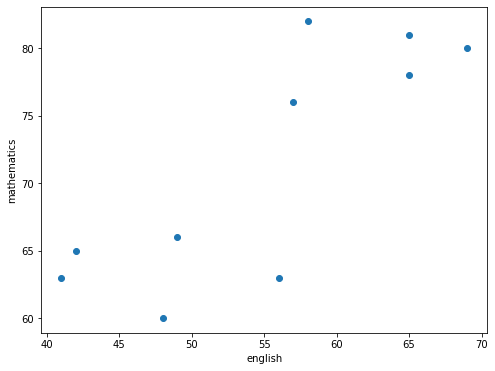

In [277]:
#산점도
df2= dfc[['english','mathematics']]
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.scatter(df2.english,df2.mathematics)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (25,) and (10,)

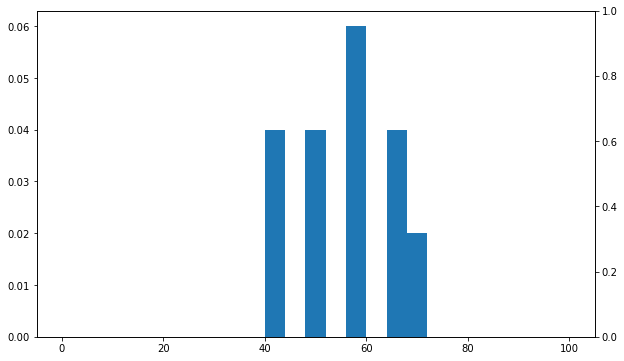

In [354]:
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)

ax2=ax1.twinx()
weights=np.ones_like(en_scores)/len(eng_scores)
rel_freq,_,_=ax1.hist(en_scores,bins=25,range=(0,100),weights=weights)
cul_rel_freq =np.cumsum(rel_freq)
class_value=[(i+(i+4))//2 for i in range(0,100,4)]
ax1.plot(class_value,cum_rel_freq,ls='--',marker='o',color='gray')
plt.show()